In [1]:
import pandas as pd
import numpy as np
from pylab import savefig



# Exploratory Data Analysis

### Load Data

In [2]:
# Read all the data in
players = pd.read_json('profiles.json').apply(lambda x: x.str.strip() if x.dtype == "object" else x)
games = pd.read_json('games.json').apply(lambda x: x.str.strip() if x.dtype == "object" else x)
hof = pd.read_csv('hof.csv').rename(columns={'From': 'year', 'To': 'end_year', 'Player': 'name'})[['name', 'Indct', 'year', 'end_year']].apply(lambda x: x.str.strip() if x.dtype == "object" else x)
noms = pd.read_csv('noms.csv').apply(lambda x: x.str.strip() if x.dtype == "object" else x)


### Data Cleaning

In [3]:
data = games.merge(players, on = 'player_id', how='outer') # merge in player data

data_inter = data.drop(columns=[
    'date',
    'game_location',
    'game_number',
    'opponent',
    'opponent_score',
    'player_team_score',
    'passing_rating',
    'birth_date',
    'birth_place',
    'current_salary',
    'current_team',
    'death_date',
    'draft_team',
    'draft_year', 
    'height', 
    'weight',
    'hof_induction_year'
])
data_inter = data_inter.fillna(0)
data_inter['end_year'] = data_inter['year']
data_clean = data_inter.set_index('player_id')

data_clean.head()

,age,defense_interception_touchdowns,defense_interception_yards,defense_interceptions,defense_sacks,defense_safeties,defense_tackle_assists,defense_tackles,field_goal_attempts,field_goal_makes,...,rushing_yards,team,year,college,draft_position,draft_round,high_school,name,position,end_year
player_id,,,,,,,,,,,,,,,,,,,,,
1809,23-120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,SEA,1990.0,Baylor,34.0,2.0,"Van Vleck, TX",Robert Blackmon,DB,1990.0
1809,23-127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,SEA,1990.0,Baylor,34.0,2.0,"Van Vleck, TX",Robert Blackmon,DB,1990.0
1809,23-134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,SEA,1990.0,Baylor,34.0,2.0,"Van Vleck, TX",Robert Blackmon,DB,1990.0
1809,23-142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,SEA,1990.0,Baylor,34.0,2.0,"Van Vleck, TX",Robert Blackmon,DB,1990.0
1809,23-148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,SEA,1990.0,Baylor,34.0,2.0,"Van Vleck, TX",Robert Blackmon,DB,1990.0


In [4]:
clean_grouped = data_clean.groupby(['player_id']) # groups all player games together
clean_grouped.count().sort_values(by=['age'], ascending=[0]).head(5) # counts total number of games per player


,age,defense_interception_touchdowns,defense_interception_yards,defense_interceptions,defense_sacks,defense_safeties,defense_tackle_assists,defense_tackles,field_goal_attempts,field_goal_makes,...,rushing_yards,team,year,college,draft_position,draft_round,high_school,name,position,end_year
player_id,,,,,,,,,,,,,,,,,,,,,
399,393,393,393,393,393,393,393,393,393,393,...,393,393,393,393,393,393,393,393,393,393
448,376,376,376,376,376,376,376,376,376,376,...,376,376,376,376,376,376,376,376,376,376
22951,375,375,375,375,375,375,375,375,375,375,...,375,375,375,375,375,375,375,375,375,375
6755,363,363,363,363,363,363,363,363,363,363,...,363,363,363,363,363,363,363,363,363,363
8989,333,333,333,333,333,333,333,333,333,333,...,333,333,333,333,333,333,333,333,333,333


In [5]:
data_final = clean_grouped.agg({
    'name': ['first'],
    'age': ['max'], 
    'year': ['min'], 
    'end_year': ['max'], 
    'defense_interception_touchdowns': ['sum'], 
    'defense_interception_yards': ['sum'],
    'defense_interceptions': ['sum'],
    'defense_sacks': ['sum'], 
    'defense_safeties': ['sum'],
    'defense_tackle_assists': ['sum'], 
    'defense_tackles': ['sum'],
    'field_goal_attempts': ['sum'],
    'field_goal_makes': ['sum'],
    'game_won': ['sum'], 
    'kick_return_attempts': ['sum'],
    'kick_return_touchdowns': ['sum'],
    'kick_return_yards': ['sum'],
    'passing_attempts': ['sum'],
    'passing_completions': ['sum'], 
    'passing_interceptions': ['sum'], 
    'passing_sacks': ['sum'], 
    'passing_sacks_yards_lost': ['sum'], 
    'passing_touchdowns': ['sum'],
    'passing_yards': ['sum'],
    'point_after_attemps': ['sum'],
    'point_after_makes': ['sum'],
    'punt_return_attempts': ['sum'], 
    'punt_return_touchdowns': ['sum'],
    'punt_return_yards': ['sum'], 
    'punting_attempts': ['sum'],
    'punting_blocked': ['sum'],
    'punting_yards': ['sum'], 
    'receiving_receptions': ['sum'], 
    'receiving_targets': ['sum'],
    'receiving_touchdowns': ['sum'], 
    'receiving_yards': ['sum'],
    'rushing_attempts': ['sum'],
    'rushing_touchdowns': ['sum'], 
    'rushing_yards': ['sum'],
    'draft_position': ['first'],
    'draft_round': ['first'],
    'position': ['first'] # most frequent
    
})

data_final.columns = data_final.columns.get_level_values(0) # resets columns / flattens columns


In [6]:
nominees = noms.merge(data_final.reset_index(), on=['name', 'year', 'end_year'], how='left').set_index(['player_id'])
nominees['years_played'] = nominees['end_year'] - nominees['year'] + 1
nominees = nominees.fillna(0)
nominees = nominees.drop(columns=['name','age','year','end_year','position','years_played']).reset_index()
nominees = nominees.loc[nominees['player_id'].isin([2782,10156.0,23246.0])].drop(columns=['player_id'])




data_hof = data_final.reset_index().merge(hof, on=['name','year', 'end_year'], how='left') # merge in hof status
data_hof['years_played'] = data_hof['end_year'] - data_hof['year'] + 1
data_hof = data_hof.fillna(0)
data_hof['is_hof'] = np.where(data_hof['Indct']==0, 0, 1) # sets the Hall of Fame indicator
data_hof = data_hof[data_hof['years_played'] >= 5] #only considers players with at least 5 years in the league



### Filter Skill Players

In [7]:
# Select anyone with a position tag and put them in the respective position group.
qb_data = data_hof[data_hof['position'].str.contains('QB')]
rb_data = data_hof[data_hof['position'].str.contains('RB')]
wr_data = data_hof[data_hof['position'].str.contains('WR')]

# Filter datasets to get rid of accidental additions to position group.
qb_all = qb_data[qb_data['passing_yards'] > 2000]
rb_all = rb_data[rb_data['rushing_yards'] > 500]
wr_all = wr_data[wr_data['receiving_yards'] > 500]


### Data Visualization - All Skill Players

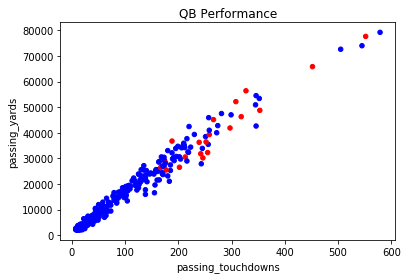

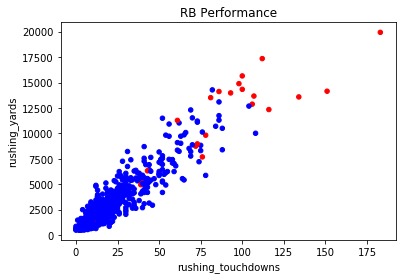

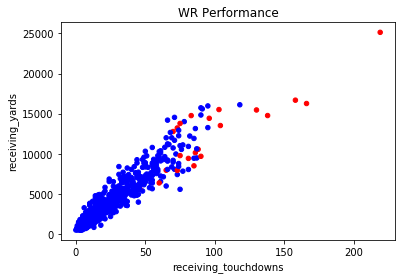

In [8]:
qb_all.plot.scatter(x='passing_touchdowns', y='passing_yards', c='is_hof', colormap='bwr', colorbar=False, title='QB Performance')
savefig('qb_all.png', bbox_inches='tight')

rb_all.plot.scatter(x='rushing_touchdowns', y='rushing_yards', c='is_hof', colormap='bwr', colorbar=False, title='RB Performance')
savefig('rb_all.png', bbox_inches='tight')

wr_all.plot.scatter(x='receiving_touchdowns', y='receiving_yards', c='is_hof', colormap='bwr', colorbar=False, title='WR Performance')
savefig('wr_all.png', bbox_inches='tight')


In [9]:
# clean out players who are potentially great, but are playing too soon to be eligible for HOF
qb_clean = qb_all[qb_all['end_year']<2012]
rb_clean = rb_all[rb_all['end_year']<2012]
wr_clean = wr_all[wr_all['end_year']<2012]

### Data Visualization - Remove Ineligible Players

,player_id,name,age,year,end_year,defense_interception_touchdowns,defense_interception_yards,defense_interceptions,defense_sacks,defense_safeties,...,receiving_yards,rushing_attempts,rushing_touchdowns,rushing_yards,draft_position,draft_round,position,Indct,years_played,is_hof
98,99,Tony Adams,37-213,1975.0,1987.0,0.0,0.0,0.0,0.0,0.0,...,-7.0,38.0,0.0,155.0,343.0,14.0,QB,0.0,13.0,0
16859,16860,Dan Orlovsky,32-075,2005.0,2015.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,0.0,34.0,145.0,5.0,QB,0.0,11.0,0
16639,16640,Neil O'Donnell,37-178,1991.0,2003.0,0.0,0.0,0.0,0.0,0.0,...,0.0,227.0,4.0,471.0,70.0,3.0,QB,0.0,13.0,0
16627,16628,Tommy O'Connell,30-349,1953.0,1961.0,0.0,0.0,0.0,0.0,0.0,...,0.0,61.0,4.0,72.0,212.0,18.0,QB,0.0,9.0,0
16618,16619,Ken O'Brien,32-359,1984.0,1993.0,0.0,0.0,0.0,0.0,0.0,...,27.0,180.0,0.0,430.0,24.0,1.0,QB,0.0,10.0,0
16441,16442,Kent Nix,28-280,1967.0,1972.0,0.0,0.0,0.0,0.0,0.0,...,0.0,43.0,2.0,145.0,0.0,0.0,QB,0.0,6.0,0
16427,16428,Jim Ninowski,33-221,1958.0,1969.0,0.0,0.0,0.0,0.0,0.0,...,0.0,92.0,10.0,367.0,49.0,4.0,QB,0.0,12.0,0
16413,16414,Gifford Nielsen,29-012,1978.0,1983.0,0.0,0.0,0.0,0.0,0.0,...,0.0,32.0,0.0,98.0,73.0,3.0,QB,0.0,6.0,0
16362,16363,Cam Newton,28-199,2011.0,2017.0,0.0,0.0,0.0,0.0,0.0,...,33.0,827.0,55.0,4251.0,1.0,1.0,QB,0.0,7.0,0
16251,16252,Bill Nelsen,31-330,1963.0,1972.0,0.0,0.0,0.0,0.0,0.0,...,-5.0,88.0,2.0,82.0,136.0,10.0,QB,0.0,10.0,0


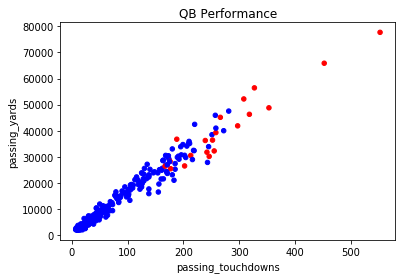

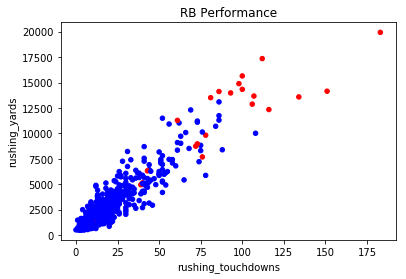

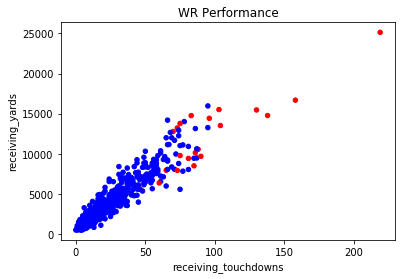

In [10]:
qb_clean.plot.scatter(x='passing_touchdowns', y='passing_yards', c='is_hof', colormap='bwr', colorbar=False, title='QB Performance')
savefig('qb.png', bbox_inches='tight')

rb_clean.plot.scatter(x='rushing_touchdowns', y='rushing_yards', c='is_hof', colormap='bwr', colorbar=False, title='RB Performance')
savefig('rb.png', bbox_inches='tight')

wr_clean.plot.scatter(x='receiving_touchdowns', y='receiving_yards', c='is_hof', colormap='bwr', colorbar=False, title='WR Performance')
savefig('wr.png', bbox_inches='tight')

qb_all.sort_values(by=['is_hof'],ascending=True)


# Modeling

In [11]:
import sklearn
from sklearn.utils import shuffle
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


import matplotlib.pyplot as plt


## Logistic Regression

### QB Model

In [12]:
# Create train and test sets
qb_X = qb_clean.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
qb_y = qb_clean.set_index('player_id')['is_hof']

qb_HOF = shuffle(qb_clean[qb_clean['is_hof']==1])
qb_HOFn = shuffle(qb_clean[qb_clean['is_hof']==0])

# 17/ 338 QBs are HOF. About 5% population
qb_train = shuffle(pd.concat([qb_HOF.head(14), qb_HOFn.head(14)]))
qb_test = shuffle(pd.concat([qb_HOF.tail(3), qb_HOFn.tail(57)])) # the 3 test QBs are 5% of 60 so: (60 - 3)

qbX_train = qb_train.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
qby_train = qb_train.set_index('player_id')['is_hof']

qbX_test = qb_test.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
qby_test = qb_test.set_index('player_id')['is_hof']

#### Optimal Alpha

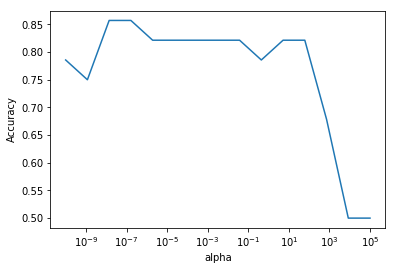

Best alpha:  1.389495494373136e-08
Theta found by sklearn:  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.71417056e-05  0.00000000e+00
   0.00000000e+00  5.85482089e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  7.20386116e-02 -1.12938144e-01 -2.88219703e-02
   4.74321460e-03 -9.28248258e-03 -2.69460268e-02  1.12208736e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.75729034e-03  1.18372633e-04  8.11648973e-02
   1.98633750e-03  9.52445820e-04  4.73442146e-04  3.87100685e-02
  -3.89255936e-03 -2.80882807e-03 -8.87220145e-03 -8.10514948e-02
  -5.98732882e-03]] [-0.00258391]


In [13]:
n_alphas = 15
alphas = np.logspace(-10, 5, n_alphas)
scores = []

for alpha in alphas:
    logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='liblinear',fit_intercept=True, penalty='l1')
    logreg.fit(qbX_train, qby_train)
    score = cross_val_score(logreg, qbX_train, qby_train,
                             scoring='accuracy', cv=7)
    scores.append(np.mean(score))

score_dict = zip(alphas, scores)
max_pair = max(score_dict,key=lambda item:item[1])
plt.semilogx(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

alpha = max_pair[0]
print("Best alpha: ", alpha)

logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='liblinear',fit_intercept=True)
logreg.fit(qbX_train, qby_train)
print("Theta found by sklearn: ", logreg.coef_, logreg.intercept_)




#### QB Train Stats

In [14]:
y_pred_discrete = logreg.predict(qbX_train)
print ('Training set acc: ' + str(accuracy_score(qby_train, y_pred_discrete)))
cm = confusion_matrix(qby_train, y_pred_discrete)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print ('Specificity: ' + str(specificity))
print ('Sensitivity: ' + str(sensitivity))
y_pred = logreg.predict_proba(qbX_train)
print ('Train AUC: ' + str(roc_auc_score(qby_train, y_pred[:,1])))


Training set acc: 1.0
[[14  0]
 [ 0 14]]
Specificity: 1.0
Sensitivity: 1.0
Train AUC: 1.0


#### QB Test Stats

In [16]:
y_pred_discrete = logreg.predict(qbX_test)
cm = confusion_matrix(qby_test, y_pred_discrete)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print ('Specificity: ' + str(specificity))
print ('Sensitivity: ' + str(sensitivity))
y_pred = logreg.predict_proba(qbX_test)
print ('Test set acc: ' + str(accuracy_score(qby_test, y_pred_discrete)))
print ('Test AUC: ' + str(roc_auc_score(qby_test, y_pred[:,1])))


[[49  8]
 [ 1  2]]
[49  8  1  2]
Specificity: 0.8596491228070176
Sensitivity: 0.6666666666666666
Test set acc: 0.85
Test AUC: 0.8888888888888888


### RB Model

In [17]:
# Getting the training and test sets
rb_X = rb_clean.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
rb_y = rb_clean.set_index('player_id')['is_hof']

rb_HOF = shuffle(rb_clean[rb_clean['is_hof']==1])
rb_HOFn = shuffle(rb_clean[rb_clean['is_hof']==0])

# 18/ 652 rbs are HOF. About 2.7% population
rb_train = shuffle(pd.concat([rb_HOF.head(16), rb_HOFn.head(16)]))
rb_test = shuffle(pd.concat([rb_HOF.tail(2), rb_HOFn.tail(64)])) # the 2 test rbs are 2.7% of 66 so: (66 - 2)

rbX_train = rb_train.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
rby_train = rb_train.set_index('player_id')['is_hof']

rbX_test = rb_test.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
rby_test = rb_test.set_index('player_id')['is_hof']




#### Optimal Alpha

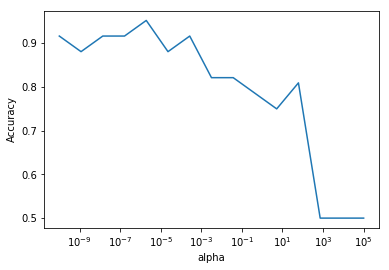

Best alpha:  1.9306977288832498e-06
Theta found by sklearn:  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -6.55049982e-03 -3.12262400e-02  0.00000000e+00
   0.00000000e+00 -5.98088793e-01 -5.49364815e-03  1.03257089e-03
  -2.48947947e-02 -2.85753045e-02 -1.03731006e-01  2.52392403e-03
   1.22910530e-05  1.26047835e-03 -5.68869156e-03 -3.58413766e-02
   0.00000000e+00  0.00000000e+00  6.27749461e-03  1.86391668e-04
   6.95898280e-02  5.01267558e-04  0.00000000e+00  2.03986722e-02
   1.12494757e-01 -8.74155281e-02  1.70113443e-02 -1.52646162e-04
   6.41093824e-02  1.96876479e-01 -1.11395197e-02 -3.66595440e-01
  -8.30991556e-03]] [-0.05514582]


In [43]:
n_alphas = 15
alphas = np.logspace(-10, 5, n_alphas)
scores = []

for alpha in alphas:
    logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='liblinear',fit_intercept=True, penalty='l1')
    logreg.fit(rbX_train, rby_train)
    score = cross_val_score(logreg, rbX_train, rby_train,
                             scoring='accuracy', cv=7)
    scores.append(np.mean(score))

score_dict = zip(alphas, scores)
max_pair = max(score_dict,key=lambda item:item[1])
plt.semilogx(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

alpha = max_pair[0]
print("Best alpha: ", alpha)

logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='liblinear',fit_intercept=True)
logreg.fit(rbX_train, rby_train)
print("Theta found by sklearn: ", logreg.coef_, logreg.intercept_)






#### RB Train Stats

In [44]:
y_pred_discrete = logreg.predict(rbX_train)
print ('Training set acc: ' + str(accuracy_score(rby_train, y_pred_discrete)))
cm = confusion_matrix(rby_train, y_pred_discrete)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print ('Specificity: ' + str(specificity))
print ('Sensitivity: ' + str(sensitivity))
y_pred = logreg.predict_proba(rbX_train)
print ('Train AUC: ' + str(roc_auc_score(rby_train, y_pred[:,1])))




Training set acc: 1.0
[[16  0]
 [ 0 16]]
Specificity: 1.0
Sensitivity: 1.0
Train AUC: 1.0


#### RB Test Stats

In [45]:
y_pred_discrete = logreg.predict(rbX_test)
cm = confusion_matrix(rby_test, y_pred_discrete)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print ('Specificity: ' + str(specificity))
print ('Sensitivity: ' + str(sensitivity))
y_pred = logreg.predict_proba(rbX_test)
print ('Test set acc: ' + str(accuracy_score(rby_test, y_pred_discrete)))
print ('Test AUC: ' + str(roc_auc_score(rby_test, y_pred[:,1])))




[[52 12]
 [ 2  0]]
Specificity: 0.8125
Sensitivity: 0.0
Test set acc: 0.7878787878787878
Test AUC: 0.3515625


### WR Model

In [76]:
# Getting the training and test sets
wr_X = wr_clean.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
wr_y = wr_clean.set_index('player_id')['is_hof']

wr_HOF = shuffle(wr_clean[wr_clean['is_hof']==1])
wr_HOFn = shuffle(wr_clean[wr_clean['is_hof']==0])

# 20/ 667 wrs are HOF. About 2.9% population
# 667 total, 20 HOF (2.9 percent), 
wr_train = shuffle(pd.concat([wr_HOF.head(18), wr_HOFn.head(18)]))
wr_test = shuffle(pd.concat([wr_HOF.tail(2), wr_HOFn.tail(64)])) # the 2 test wrs are 2.9% of 60 so: (60 - 3)

wrX_train = wr_train.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
wry_train = wr_train.set_index('player_id')['is_hof']

wrX_test = wr_test.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
wry_test = wr_test.set_index('player_id')['is_hof']




#### Optimal Alpha

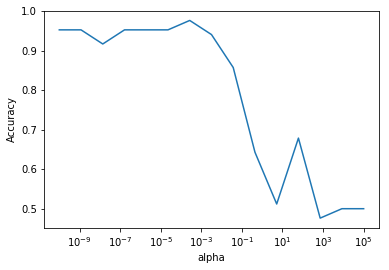

Best alpha:  0.0002682695795279727
Theta found by sklearn:  [[ 0.00000000e+00  2.07662403e-02  9.03557343e-04  1.55785749e-05
   0.00000000e+00 -3.88286530e-01 -9.98873979e-01  0.00000000e+00
   0.00000000e+00  5.09298392e-02 -8.63538565e-02  3.03163352e-02
  -5.02117392e-03  6.96595091e-02 -2.54503381e-01  2.35343510e-03
   0.00000000e+00  0.00000000e+00  1.02787984e-02  3.14382525e-01
   0.00000000e+00  0.00000000e+00 -7.40981157e-01  1.29514974e-02
   7.83997103e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.51786002e-02  6.41478297e-03  2.54301188e-01  1.46503371e-03
  -1.65633578e-01  6.74626405e-02  3.27308909e-02 -4.78134804e-02
  -2.91695081e-01]] [-1.197598]


In [77]:
n_alphas = 15
alphas = np.logspace(-10, 5, n_alphas)
scores = []

for alpha in alphas:
    logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='liblinear',fit_intercept=True, penalty='l1')
    logreg.fit(wrX_train, wry_train)
    score = cross_val_score(logreg, wrX_train, wry_train,
                             scoring='accuracy', cv=7)
    scores.append(np.mean(score))

score_dict = zip(alphas, scores)
max_pair = max(score_dict,key=lambda item:item[1])
plt.semilogx(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

alpha = max_pair[0]
print("Best alpha: ", alpha)

logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='liblinear',fit_intercept=True)
logreg.fit(wrX_train, wry_train)
print("Theta found by sklearn: ", logreg.coef_, logreg.intercept_)






#### WR Train Stats

In [78]:
y_pred_discrete = logreg.predict(wrX_train)
print ('Training set acc: ' + str(accuracy_score(wry_train, y_pred_discrete)))
cm = confusion_matrix(wry_train, y_pred_discrete)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print ('Specificity: ' + str(specificity))
print ('Sensitivity: ' + str(sensitivity))
y_pred = logreg.predict_proba(wrX_train)
print ('Train AUC: ' + str(roc_auc_score(wry_train, y_pred[:,1])))




Training set acc: 0.9722222222222222
[[17  1]
 [ 0 18]]
Specificity: 0.9444444444444444
Sensitivity: 1.0
Train AUC: 1.0


#### WR Test Stats

In [79]:
y_pred_discrete = logreg.predict(wrX_test)
cm = confusion_matrix(wry_test, y_pred_discrete)
print(cm)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print ('Specificity: ' + str(specificity))
print ('Sensitivity: ' + str(sensitivity))
y_pred = logreg.predict_proba(wrX_test)
print ('Test set acc: ' + str(accuracy_score(wry_test, y_pred_discrete)))
print ('Test AUC: ' + str(roc_auc_score(wry_test, y_pred[:,1])))




[[51 13]
 [ 1  1]]
Specificity: 0.796875
Sensitivity: 0.5
Test set acc: 0.7878787878787878
Test AUC: 0.671875


#### Testing the WR model on the three WR 2019 Nominees

In [80]:
logreg.predict(nominees)


array([1, 0, 0])

## Feed Forward Neural Networks

In [82]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout 
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))


In [83]:
qbX_train = qb_train.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
qby_train = qb_train.set_index('player_id')['is_hof']

qbX_test = qb_test.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
qby_test = qb_test.set_index('player_id')['is_hof']

rbX_train = rb_train.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
rby_train = rb_train.set_index('player_id')['is_hof']

rbX_test = rb_test.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
rby_test = rb_test.set_index('player_id')['is_hof']

wrX_train = wr_train.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
wry_train = wr_train.set_index('player_id')['is_hof']

wrX_test = wr_test.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
wry_test = wr_test.set_index('player_id')['is_hof']

nb_classes = 2
qby_train = np_utils.to_categorical(qby_train, nb_classes)
qby_test = np_utils.to_categorical(qby_test, nb_classes)

rby_train = np_utils.to_categorical(rby_train, nb_classes)
rby_test = np_utils.to_categorical(rby_test, nb_classes)

wry_train = np_utils.to_categorical(wry_train, nb_classes)
wry_test = np_utils.to_categorical(wry_test, nb_classes)

### QB Model

Train on 28 samples, validate on 60 samples
Epoch 1/6
28/28 [==============================] - 0s 18ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.8059 - val_acc: 0.9500
Epoch 2/6
28/28 [==============================] - 0s 224us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.8059 - val_acc: 0.9500
Epoch 3/6
28/28 [==============================] - 0s 168us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.8059 - val_acc: 0.9500
Epoch 4/6
28/28 [==============================] - 0s 163us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.8059 - val_acc: 0.9500
Epoch 5/6
28/28 [==============================] - 0s 156us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.8059 - val_acc: 0.9500
Epoch 6/6
28/28 [==============================] - 0s 107us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.8059 - val_acc: 0.9500
Test loss: 0.8059048056602478
Test accuracy: 0.950000007947286


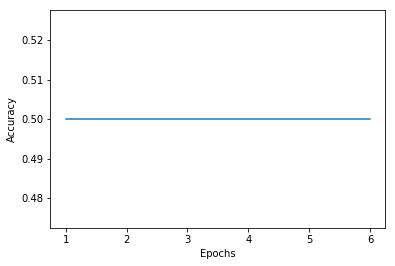

In [90]:
shape = 37
ep_num = 6

model_qb = Sequential()

model_qb.add(Dense(512, input_shape=(shape,)))
model_qb.add(Activation('relu'))
model_qb.add(Dropout(0.2)) 

model_qb.add(Dense(nb_classes))
model_qb.add(Activation('softmax')) 

model_qb.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = AccuracyHistory()

model_qb.fit(qbX_train, qby_train,
          batch_size=128, epochs=ep_num,
          verbose=1,validation_data=(qbX_test, qby_test),
          callbacks=[history])
# plot scores
score1 = model_qb.evaluate(qbX_test, qby_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])
plt.plot(range(1, ep_num + 1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


### RB Model

Train on 32 samples, validate on 66 samples
Epoch 1/6
32/32 [==============================] - 0s 10ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 2/6
32/32 [==============================] - 0s 153us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 3/6
32/32 [==============================] - 0s 129us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 4/6
32/32 [==============================] - 0s 197us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 5/6
32/32 [==============================] - 0s 192us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 6/6
32/32 [==============================] - 0s 177us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Test loss: 0.4884272199688536
Test accuracy: 0.9696969696969697


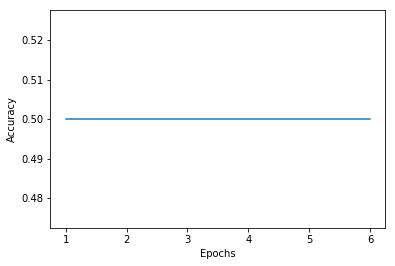

In [85]:
shape = 37
ep_num = 6

model_rb = Sequential()

model_rb.add(Dense(512, input_shape=(shape,)))
model_rb.add(Activation('relu'))
model_rb.add(Dropout(0.2)) 

model_rb.add(Dense(nb_classes))
model_rb.add(Activation('softmax')) 

model_rb.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = AccuracyHistory()

model_rb.fit(rbX_train, rby_train,
          batch_size=128, epochs=ep_num,
          verbose=1,validation_data=(rbX_test, rby_test),
          callbacks=[history])
# plot scores
score1 = model_rb.evaluate(rbX_test, rby_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])
plt.plot(range(1, ep_num + 1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


### WR Model

Train on 36 samples, validate on 66 samples
Epoch 1/6
36/36 [==============================] - 1s 20ms/step - loss: 7.6113 - acc: 0.5278 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 2/6
36/36 [==============================] - 0s 162us/step - loss: 7.8188 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 3/6
36/36 [==============================] - 0s 166us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 4/6
36/36 [==============================] - 0s 165us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 5/6
36/36 [==============================] - 0s 176us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Epoch 6/6
36/36 [==============================] - 0s 175us/step - loss: 8.0590 - acc: 0.5000 - val_loss: 0.4884 - val_acc: 0.9697
Test loss: 0.4884271946820346
Test accuracy: 0.9696969696969697


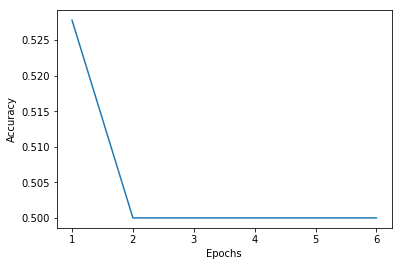

In [98]:
shape = 37
ep_num = 6

model_wr = Sequential()

model_wr.add(Dense(512, input_shape=(shape,)))
model_wr.add(Activation('relu'))
model_wr.add(Dropout(0.2)) 

model_wr.add(Dense(256))
model_wr.add(Activation('relu'))
model_wr.add(Dropout(0.2)) 


model_wr.add(Dense(nb_classes))
model_wr.add(Activation('softmax')) 

model_wr.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = AccuracyHistory()

model_wr.fit(wrX_train, wry_train,
          batch_size=128, epochs=ep_num,
          verbose=1,validation_data=(wrX_test, wry_test),
          callbacks=[history])
# plot scores
score1 = model_wr.evaluate(wrX_test, wry_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])
plt.plot(range(1, ep_num + 1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#### Testing the WR model on the three WR 2019 Nominees

In [99]:
model_wr.predict(nominees)

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

## Decision Trees

In [100]:
from sklearn.tree import DecisionTreeClassifier


### QB Model

In [101]:
# Create train and test sets
qb_X = qb_clean.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
qb_y = qb_clean.set_index('player_id')['is_hof']

qb_HOF = shuffle(qb_clean[qb_clean['is_hof']==1])
qb_HOFn = shuffle(qb_clean[qb_clean['is_hof']==0])

# 17/ 338 QBs are HOF. About 5% population
qb_train = shuffle(pd.concat([qb_HOF.head(14), qb_HOFn.head(14)]))
qb_test = shuffle(pd.concat([qb_HOF.tail(3), qb_HOFn.tail(57)])) # the 3 test QBs are 5% of 60 so: (60 - 3)

qbX_train = qb_train.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
qby_train = qb_train.set_index('player_id')['is_hof']

qbX_test = qb_test.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
qby_test = qb_test.set_index('player_id')['is_hof']



# Getting the training and test sets
rb_X = rb_clean.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
rb_y = rb_clean.set_index('player_id')['is_hof']

rb_HOF = shuffle(rb_clean[rb_clean['is_hof']==1])
rb_HOFn = shuffle(rb_clean[rb_clean['is_hof']==0])

# 18/ 652 rbs are HOF. About 2.7% population
rb_train = shuffle(pd.concat([rb_HOF.head(16), rb_HOFn.head(16)]))
rb_test = shuffle(pd.concat([rb_HOF.tail(2), rb_HOFn.tail(64)])) # the 2 test rbs are 2.7% of 66 so: (66 - 2)

rbX_train = rb_train.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
rby_train = rb_train.set_index('player_id')['is_hof']

rbX_test = rb_test.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
rby_test = rb_test.set_index('player_id')['is_hof']



# Getting the training and test sets
wr_X = wr_clean.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
wr_y = wr_clean.set_index('player_id')['is_hof']

wr_HOF = shuffle(wr_clean[wr_clean['is_hof']==1])
wr_HOFn = shuffle(wr_clean[wr_clean['is_hof']==0])

# 20/ 667 wrs are HOF. About 2.9% population
# 667 total, 20 HOF (2.9 percent), 
wr_train = shuffle(pd.concat([wr_HOF.head(18), wr_HOFn.head(18)]))
wr_test = shuffle(pd.concat([wr_HOF.tail(2), wr_HOFn.tail(64)])) # the 2 test wrs are 2.9% of 60 so: (60 - 3)

wrX_train = wr_train.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
wry_train = wr_train.set_index('player_id')['is_hof']

wrX_test = wr_test.drop(columns=['name','age','year','end_year','position','years_played','is_hof', 'Indct']).set_index('player_id')
wry_test = wr_test.set_index('player_id')['is_hof']




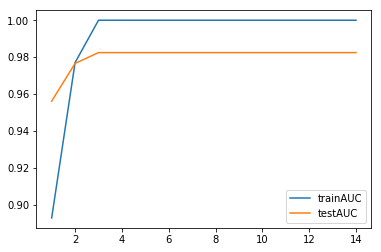

Test acc: 0.9824561403508771


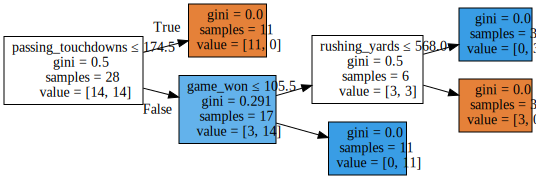

In [211]:
depthData = pd.DataFrame(columns=['trainAUC', 'testAUC'])
depths = np.arange(1,15)
trainAUCs = []
testAUCs = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(qbX_train, qby_train)
    ypredTest = clf.predict_proba(qbX_test)
    ypredTrain = clf.predict_proba(qbX_train)
    depthData.at[depth,'trainAUC'] = roc_auc_score(qby_train, ypredTrain[:,1])
    depthData.at[depth,'testAUC'] = roc_auc_score(qby_test, ypredTest[:,1])

depthData.plot(use_index=True)
plt.show()
new = depthData.columns[depthData.dtypes.eq(object)] #get the object column of the best_c
depthData[new] = depthData[new].apply(pd.to_numeric, errors = 'coerce', axis=0) # change the type of object

clf = DecisionTreeClassifier(max_depth=depthData['testAUC'].idxmax())
clf.fit(qbX_train, qby_train)
import graphviz
dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                         feature_names=qbX_train.columns,  
                         filled=True,  
                         special_characters=True, 
                                        rotate=True)

ypredTest = clf.predict_proba(qbX_test)
print('Test acc: ' + str(roc_auc_score(qby_test, ypredTest[:,1])))
graph = graphviz.Source(dot_data)  
graph
#graph.format = 'png'
#graph.render('dtree_render',view=True)


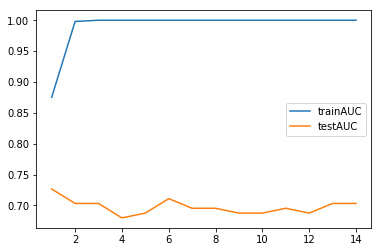

Test acc: 0.7265625


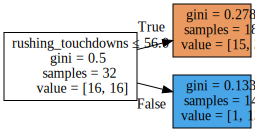

In [102]:
depthData = pd.DataFrame(columns=['trainAUC', 'testAUC'])
depths = np.arange(1,15)
trainAUCs = []
testAUCs = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(rbX_train, rby_train)
    ypredTest = clf.predict_proba(rbX_test)
    ypredTrain = clf.predict_proba(rbX_train)
    depthData.at[depth,'trainAUC'] = roc_auc_score(rby_train, ypredTrain[:,1])
    depthData.at[depth,'testAUC'] = roc_auc_score(rby_test, ypredTest[:,1])

depthData.plot(use_index=True)
plt.show()
new = depthData.columns[depthData.dtypes.eq(object)] #get the object column of the best_c
depthData[new] = depthData[new].apply(pd.to_numeric, errors = 'coerce', axis=0) # change the type of object

clf = DecisionTreeClassifier(max_depth=depthData['testAUC'].idxmax())
clf.fit(rbX_train, rby_train)
import graphviz
dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                         feature_names=rbX_train.columns,  
                         filled=True,  
                         special_characters=True, 
                                        rotate=True)

ypredTest = clf.predict_proba(rbX_test)
print('Test acc: ' + str(roc_auc_score(rby_test, ypredTest[:,1])))
graph = graphviz.Source(dot_data)  
graph
#graph.format = 'png'
#graph.render('dtree_render',view=True)


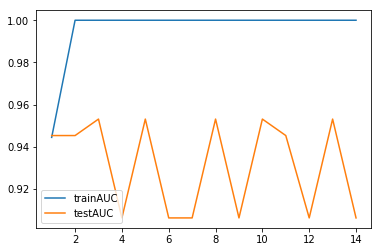

Test acc: 0.90625


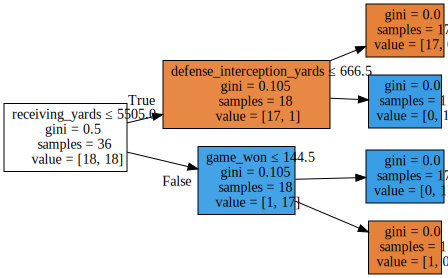

In [103]:
depthData = pd.DataFrame(columns=['trainAUC', 'testAUC'])
depths = np.arange(1,15)
trainAUCs = []
testAUCs = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(wrX_train, wry_train)
    ypredTest = clf.predict_proba(wrX_test)
    ypredTrain = clf.predict_proba(wrX_train)
    depthData.at[depth,'trainAUC'] = roc_auc_score(wry_train, ypredTrain[:,1])
    depthData.at[depth,'testAUC'] = roc_auc_score(wry_test, ypredTest[:,1])

depthData.plot(use_index=True)
plt.show()
new = depthData.columns[depthData.dtypes.eq(object)] #get the object column of the best_c
depthData[new] = depthData[new].apply(pd.to_numeric, errors = 'coerce', axis=0) # change the type of object

clf = DecisionTreeClassifier(max_depth=depthData['testAUC'].idxmax())
clf.fit(wrX_train, wry_train)
import graphviz
dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                         feature_names=wrX_train.columns,  
                         filled=True,  
                         special_characters=True, 
                                        rotate=True)

ypredTest = clf.predict_proba(wrX_test)
print('Test acc: ' + str(roc_auc_score(wry_test, ypredTest[:,1])))
graph = graphviz.Source(dot_data)  
graph
#graph.format = 'png'
#graph.render('dtree_render',view=True)
